[![Open In Colab](./images/colab-badge.png)](https://colab.research.google.com/github/abrsvn/pyactr-book/blob/master/notebooks/34_log_freq_model_of_lex_dec.ipynb)

## The log-frequency model of lexical decision

In previous notebooks, we introduced a model for participant in a simple lexical decision task. That model was sufficient introduce how we simulate interaction with the environment, but it was too simplistic in its assumptions about memory since memory retrievals were not dependent on any parameters of the retrieved word.

In this and following notebooks, we improve on that model by incorporating the ACT-R model of declarative memory we just introduced.

We start with the discussion of basic properties of word frequency and the way to model lexical decision while keeping these properties in mind. We then construct several ACT-R models that simulate lexical-decision tasks and whose retrieval is dependent on parameters of the retrieved word.

One very robust parameter affecting latencies and accuracies in lexical decision tasks is frequency (Whaley, Charles P. 1978. Word-nonword classification time. _Journal of Verbal Learning and Verbal Behavior_ 17:143–154). 

Frequency effects have been found not just in lexical decision tasks, but in many if not all tasks that involve some kind of lexical processing:

- Forster, Kenneth I. 1990. _Lexical processing_. The MIT Press.
- Monsell, Stephen. 1991. The nature and locus of word frequency effects in reading. In _Basic processes in reading: Visual word recognition_, ed. D. Besner and G. W. Humphreys, 148–197. Hillsdale, NJ: Erlbaum.

These frequency effects have a specific functional form: since Howes, Davis H, and Richard L Solomon (1951) (Visual duration threshold as a function of word-probability. _Journal of experimental psychology_ 41), it is accepted that lexical access can be well approximated as a log-function of frequency.

Modeling lexical access in terms of log-frequency provides a good, but not perfect, fit to the data.

**Murray, Wayne S, and Kenneth I Forster. 2004. Serial mechanisms in lexical access: the rank hypothesis. _Psychological Review_ 111:3, 721-756** studied the role of frequency in detail and identified various issues with the log-frequency model. The data consisted of collected responses and response times in a lexical decision task using words from 16 frequency bands, summarized in the table below.

- example words in the table are based on the _Corpus of Contemporary American English_ (COCA; [http://corpus.byu.edu/coca/](http://corpus.byu.edu/coca/), specifically the list available at [http://www.wordfrequency.info/files/entriesWithoutCollocates.txt](http://www.wordfrequency.info/files/entriesWithoutCollocates.txt), which lists frequencies of words of $450$ million words total (as of March 7, 2017).
- the chosen example word was one of the closest one to the mean frequency listed in the same row, but these were not the words used in the actual experiment: Murray & Forster (2004) controlled for other parameters, e.g., word length, while manipulating word frequency.

**Frequency bands of words used in Murray and Forster (2004) (Exp. 1); frequency reported in number of tokens per 1 million words**:

| Group | Frequency range | Mean frequency | Latency (ms) | Accuracy (%) | Example word |
|:-----:|----------------:|---------------:|-------------:|-------------:|-------------:|
|   1   |         315–197 |          242.0 |          542 |        97.22 |          guy |
|   2   |          100–85 |           92.8 |          555 |        95.56 |     somebody |
|   3   |           60–55 |           57.7 |          566 |        95.56 |       extend |
|   4   |           42–39 |           40.5 |          562 |         96.3 |        dance |
|   5   |           32–30 |           30.6 |          570 |        96.11 |        shape |
|   6   |           24–23 |           23.4 |          569 |        94.26 |      besides |
|   7   |              19 |           19.0 |          577 |           95 |          fit |
|   8   |              16 |           16.0 |          587 |        92.41 |     dedicate |
|   9   |           14-13 |           13.4 |          592 |        91.67 |        robot |
|  10   |           12–11 |           11.5 |          605 |        93.52 |         tile |
|  11   |              10 |           10.0 |          603 |        91.85 |      between |
|  12   |               9 |            9.0 |          575 |        93.52 |    precedent |
|  13   |               7 |            7.0 |          620 |        91.48 |      wrestle |
|  14   |               5 |            5.0 |          607 |        90.93 |     resonate |
|  15   |               3 |            3.0 |          622 |        84.44 |       seated |
|  16   |               1 |            1.0 |          674 |        74.63 |   habitually |



Using the RT latencies from Murray & Forster (2004), let us build a log-frequency model and evaluate the discrepancies between the predictions of the model and the data.

- we first store the data in two variables ```freq``` (mean frequency) and ```rt``` (reaction time / latency; measured in s).

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import numpy as np
import pandas as pd

import pymc3 as pm

In [2]:
freq = np.array([242, 92.8, 57.7, 40.5, 30.6, 23.4, 19,
                 16, 13.4, 11.5, 10, 9, 7, 5, 3, 1])
rt = np.array([542, 555, 566, 562, 570, 569, 577, 587,
               592, 605, 603, 575, 620, 607, 622, 674])/1000
accuracy = np.array([97.22, 95.56, 95.56, 96.3, 96.11, 94.26,
                     95, 92.41, 91.67, 93.52, 91.85, 93.52,
                     91.48, 90.93, 84.44, 74.63])/100

We can now build a Bayesian model, very similar to the one for the exponential model of forgetting we built before:

In [3]:
log_freq_model = pm.Model()
with log_freq_model:
    # priors
    intercept = pm.Normal('intercept', mu=0, sd=300)
    slope = pm.Normal('slope', mu=0, sd=300)
    sigma = pm.HalfNormal('sigma', sd=300)
    # likelihood
    mu = pm.Deterministic('mu', intercept + slope*np.log(freq))
    observed_rt = pm.Normal('observed_rt', mu=mu, sd=sigma, observed=rt)

INFO (theano.gof.compilelock): Waiting for existing lock by process '3682' (I am process '45872')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ady/.theano/compiledir_Linux-5.8--generic-x86_64-with-glibc2.29-x86_64-3.8.5-64/lock_dir


In [4]:
with log_freq_model:
    trace = pm.sample(draws=5000, tune=15000, n_init=200000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, intercept]


Sampling 4 chains for 15_000 tune and 5_000 draw iterations (60_000 + 20_000 draws total) took 19 seconds.


We can now plot the estimates of the log-frequency model:

In [5]:
mu = trace["mu"]

In [6]:
import arviz as az

/usr/local/lib/python3.8/dist-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


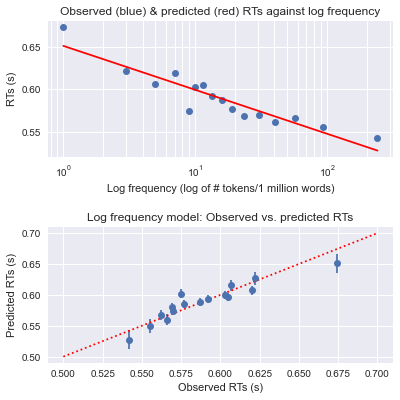

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2)
fig.set_size_inches(5.5, 5.5)

# plot 1
ax1.plot(freq, rt, marker='o', linestyle='')
ax1.plot(freq, mu.mean(axis=0), color='red', linestyle='-')
ax1.set_title('Observed (blue) & predicted (red) RTs against log frequency')
ax1.set_xlabel('Log frequency (log of # tokens/1 million words)')
ax1.set_xscale('log', base=10) # or just ax1.set_xscale('log')
ax1.set_ylabel('RTs (s)')
ax1.grid(b=True, which='minor', color='w', linewidth=1.0)

# plot 2
yerr=[mu.mean(axis=0)-az.hdi(mu)[:,0],
      az.hdi(mu)[:,1]-mu.mean(axis=0)]

ax2.errorbar(rt, mu.mean(axis=0), yerr=yerr, marker='o', linestyle='')
ax2.plot(np.linspace(0.5, 0.7, 10), np.linspace(0.5, 0.7, 10),
         color='red', linestyle=':')
ax2.set_title('Log frequency model: Observed vs. predicted RTs')
ax2.set_xlabel('Observed RTs (s)')
ax2.set_ylabel('Predicted RTs (s)')
ax2.grid(b=True, which='minor', color='w', linewidth=1.0)

plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=1.9);

- the log-frequency model gets the middle values right, but it tends to underestimate the amount of time needed to access words in the extreme frequency bands,
    - both low frequency (associated with high RTs)
    - and high frequency (associated with low RTs)
    
Next, we model frequency effects in ACT-R as practiced memory retrieval, which is commonly assumed to be a power function of time in the same way that memory performance is.